# Overview

This dataset (`data.csv`) comes from a Washington DC bike-sharing program. Each row in the bikeshare table represents a single ride within a 3-month period in 2012. Some of the columns are-

- duration seconds: duration of the ride (in seconds)
- start time, end time: datetimes representing the beginning and end of the ride
- start station, end station: name of the start and end stations for the ride
- bike number: unique identifier for the bike used for the ride
- rider-type: indicates whether user was a "registered member" (Annual Member or 30-Day Member) or a "casual rider" (Single Trip or 24-Hour/3-Day/5-Day Pass)

In [60]:
import pandas as pd

data=pd.read_csv('data.csv')
data.head()

,duration,duration_seconds,start_time,start_station,start_terminal,end_time,end_station,end_terminal,bike_number,rider_type,id
0,0h 7m 55sec.,475,1/1/2012 0:04,7th & R St NW / Shaw Library,31245,1/1/2012 0:11,7th & T St NW,31109,W01412,Registered,1
1,0h 19m 22sec.,1162,1/1/2012 0:10,Georgia & New Hampshire Ave NW,31400,1/1/2012 0:29,16th & Harvard St NW,31103,W00524,Casual,2
2,0h 19m 5sec.,1145,1/1/2012 0:10,Georgia & New Hampshire Ave NW,31400,1/1/2012 0:29,16th & Harvard St NW,31103,W00235,Registered,3
3,0h 8m 5sec.,485,1/1/2012 0:15,14th & V St NW,31101,1/1/2012 0:23,Park Rd & Holmead Pl NW,31602,W00864,Registered,4
4,0h 7m 51sec.,471,1/1/2012 0:15,11th & Kenyon St NW,31102,1/1/2012 0:23,7th & T St NW,31109,W00995,Registered,5


# Exploratory Data Analysis

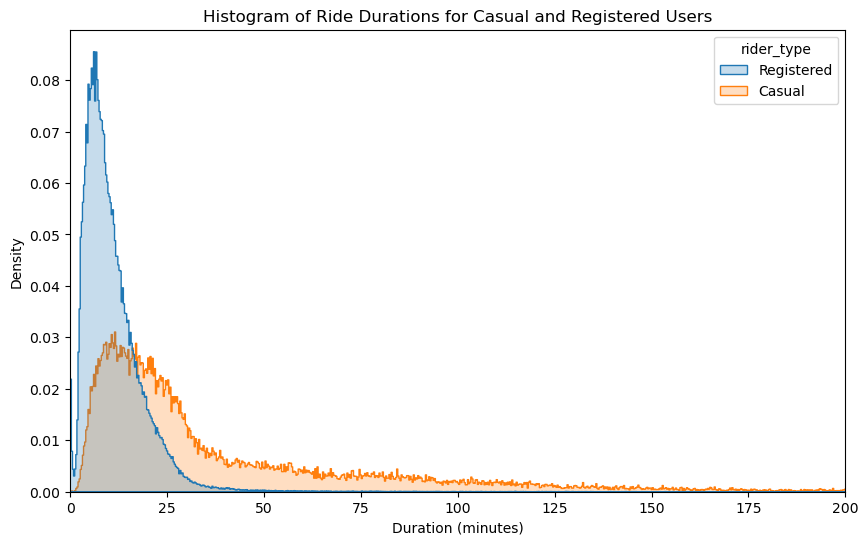

In [97]:
# converting seconds to minutes

data['duration_minutes']=data['duration_seconds']/60
data=data.round({'duration_minutes':2})

data['duration_minutes']=data['duration_seconds']/60
data=data.round({'duration_minutes':2})

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=data, x='duration_minutes', hue='rider_type', element='step', stat='density', common_norm=False)
plt.title('Histogram of Ride Durations for Casual and Registered Users')
plt.xlabel('Duration (minutes)')
plt.xlim(0, 200) 
plt.ylabel('Density')
plt.show()



# Insights 
- There are far more rides by Registered users (315,448 rides) compared to Casual users (49,308 rides).
This indicates that the majority of rides are taken by registered users,
which could be a sign of a successful subscription or registration model.
t casual users, on average, tend to have longer rides than registered users.

- Casual users tend to have more variability in ride durations and, on average, ride for longer durations. This might be because casual users are more likely to be tourists or infrequent users who are exploring the area, leading to longer ride durations.
Registered users, likely being more familiar with the service and possibly using it for commuting, have shorter and more consistent ride durations.

In [102]:
# weekly distribution

from datetime import datetime


data['start_time'] = pd.to_datetime(data['start_time'], format="%m/%d/%Y %H:%M")
data['end_time'] = pd.to_datetime(data['end_time'], format="%m/%d/%Y %H:%M")

data['start_hour'] = data['start_time'].dt.hour  
data['end_hour']=data['end_time'].dt.hour
data['day_of_week'] = data['start_time'].dt.day_name()




# Insights  and Recommendations


1. ***Rush Hours***: The bike-sharing program experiences the highest usage at 17:00 (5 pm) and 18:00 (6 pm), possibly corresponding to the end of the typical workday when users are commuting back home. Similarly, 8:00 also shows high usage, potentially reflecting the morning commute.

2. ***Midday and Afternoon Usage***: There’s consistent usage from 12:00 to 16:00, possibly due to people using bikes for lunch breaks or other midday activities. 
3. ***Evening Decrease***: After 19:00, the usage starts to decrease significantly, reflecting lesser demand during the evening and late-night hours.

***Recommendations***:
- Optimize Bike Availability: To meet high demand during rush hours, it is crucial to ensure that there are enough bikes available at key locations in the morning and evening.

- Promotional Activities: Consider promotional activities or discounted rates during the low usage hours to increase engagement and make the service more appealing during those times.

Text(0.5, 1.0, 'Week distribution')

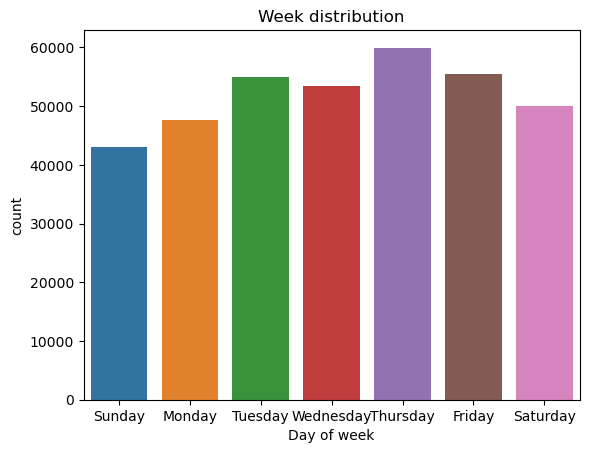

In [103]:
sns.countplot(x=data['day_of_week'])
plt.xlabel('Day of week')
plt.title('Week distribution')

In [104]:
data['start_hour'].value_counts()

17    37481
18    35277
8     32944
16    25157
19    24851
13    20815
15    20563
12    20148
14    19081
9     19018
20    17315
7     17157
11    15986
21    13327
10    13205
22     9845
23     6099
6      5925
0      3689
1      2481
2      1652
5      1571
3       816
4       353
Name: start_hour, dtype: int64

<AxesSubplot:xlabel='end_hour', ylabel='count'>

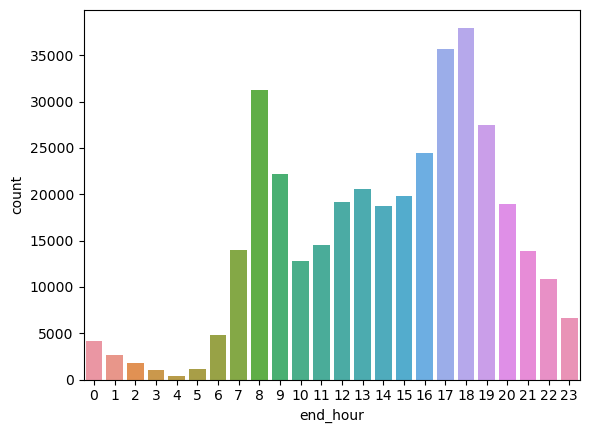

In [107]:
sns.countplot(x=data['end_hour'])

 #  Most popular bike route (start/end station combination) ?

In [61]:
# Stripping any extra spaces from start and end station names
data['start_station'] = data['start_station'].str.strip()
data['end_station'] = data['end_station'].str.strip()

# Recreate 'route' column after cleanup
data['route'] = data['start_station'] + ' to ' + data['end_station']

data['route'].value_counts()

Eastern Market Metro / Pennsylvania Ave & 7th St SE to Lincoln Park / 13th & East Capitol St NE    1383
Adams Mill & Columbia Rd NW to Calvert St & Woodley Pl NW                                          1293
Lincoln Park / 13th & East Capitol St NE to Eastern Market Metro / Pennsylvania Ave & 7th St SE    1219
Calvert St & Woodley Pl NW to Adams Mill & Columbia Rd NW                                          1167
13th & D St NE to Columbus Circle / Union Station                                                   787
                                                                                                   ... 
13th St & New York Ave NW to S Joyce & Army Navy Dr                                                   1
Metro Center / 12th & G St NW to Ward Circle / American University                                    1
14th & V St NW to 1st & N ST SE                                                                       1
27th & Crystal Dr to Lamont & Mt Pleasant NW                    

# Analysis for the station '10th St & Constitution Ave NW'
We look at how the number of bikes at the station changes throughout the day.

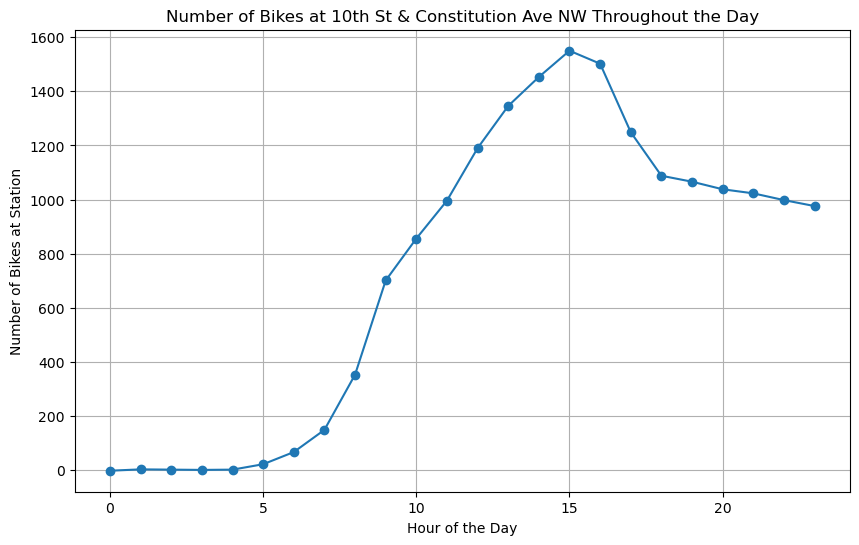

In [54]:
# get the station 

station_data=data[(data['start_station']=='10th St & Constitution Ave NW') | (data['end_station']=='10th St & Constitution Ave NW')]

# creating new df to track count of bikes

bike_changes=pd.DataFrame(index=range(24),columns=['bike_count_change'],data=0)

# loop thru the station data and update the bike changes

for index, row in station_data.iterrows():
    if row['start_station']=='10th St & Constitution Ave NW':
        bike_changes.loc[row['start_hour'],['bike_count_change']]-=1
    if row['end_station']=='10th St & Constitution Ave NW':
        bike_changes.loc[row['end_hour'],['bike_count_change']]+=1
        
# Calculate the cumulative sum to find the number of bikes at each hour

bike_changes['bikes_at_station']=bike_changes['bike_count_change'].cumsum()


 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(bike_changes.index, bike_changes['bikes_at_station'], marker='o')
plt.title('Number of Bikes at 10th St & Constitution Ave NW Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bikes at Station')
plt.grid(True)
plt.show()
        

# Strategic Recommendations


* The station experiences the **highest inflow of bikes**  during the morning rush hours and maintains a steady inflow until early afternoon. 


- **Redistribution Strategies:**
   - Implement redistributive strategies during the late afternoon to evening hours to ensure bike availability at this station, accommodating those leaving the area during this time.
   - Rebalance bikes in the early morning to other stations to meet the demand there and to manage the station's capacity effectively.

- **Infrastructure Adjustment:**
   - Consider augmenting bike parking spaces during morning hours to accommodate the high inflow and to avoid overcrowding and potential turnover to other nearby stations.
   - Evaluate the station’s vicinity and if feasible, initiate collaborations with local entities for shared parking spaces or to explore the viability of expanding the station’s docking capacity.



In [14]:
bike_changes


,bike_count_change,bikes_at_station
0,-2,-2
1,5,3
2,-1,2
3,-1,1
4,1,2
5,20,22
6,45,67
7,82,149
8,204,353
9,348,701


# Sources and Sinks

- An issue common to bike sharing program stations is an imbalance in the frequency with which bikes are picked up versus dropped . Stations where bikes are picked up more often act as sources for the system, and will naturally tend to be quite empty. Oppositely, stations where bikes are dropped o act as sinks, and may regularly be completely full of bikes.

- What two stations respectively act as the largest source and sink for the DC bike share program? Briefly discuss 2-3 factors that may underlie whether a station acts as a source or sink?


In [95]:
import pandas as pd

# we will first calculate pickup and dropof frequencies 

pickup_freq = data.groupby('start_station').size().reset_index(name='pickup_count')
dropoff_freq = data.groupby('end_station').size().reset_index(name='dropoff_count')

# doing an outer join to account for all cases ( only end_station in ride or start_station errors) 
station_freq = pd.merge(pickup_freq, dropoff_freq, left_on='start_station', right_on='end_station', how='outer')

station_freq.isna().sum()


# Calculate Frequencies per Station and Imbalance
station_freq['total_interactions'] = station_freq['pickup_count'] + station_freq['dropoff_count']
station_freq['pickup_freq_station'] = station_freq['pickup_count'] / station_freq['total_interactions']
station_freq['dropoff_freq_station'] = station_freq['dropoff_count'] / station_freq['total_interactions']
station_freq['freq_imbalance_station'] = station_freq['pickup_freq_station'] - station_freq['dropoff_freq_station']

# Identify Largest Source and Sink

largest_source_station = station_freq.loc[station_freq['freq_imbalance_station'].idxmax()]['start_station']
largest_sink_station = station_freq.loc[station_freq['freq_imbalance_station'].idxmin()]['start_station']

print(f"Largest Source Station based on Station-Specific Frequency: {largest_source_station}")
print(f"Largest Sink Station based on Station-Specific Frequency: {largest_sink_station}")



Largest Source Station based on Station-Specific Frequency: 39th & Calvert St NW / Stoddert
Largest Sink Station based on Station-Specific Frequency: Minnesota Ave Metro/DOES


 # Factors Underlying as Source or Sink:

- Demographics and Location: Stations in residential areas may act more as sources, especially in the morning as residents commute to work, whereas stations in commercial areas or workplace districts might act more as sinks.
- Time of the Day: Depending on the time of the day, a station could act either as a source or a sink. For instance, a station near a workplace may act as a source in the evening and a sink in the morning.
- Population Density: Areas with high population density might see more stations acting as sources, while less densely populated areas might have more sinks.

# Redistribution rides
 
 Station imbalances in bike share programs are often resolved by redistributing bikes 
(nightly, or on an ongoing basis throughout the day)
Let's see whether these "redistribution rides" are a part of this data set? 


# Assumptions regarding Redistribution Rides
 

 1. Redistribution rides are typically performed by the operators of the bike-sharing program, not the customers.
So, they might be marked differently in terms of rider_type, or they might occur during off-peak hours or days.
 2. They might occur at specific times, like late at night or early in the morning, when the demand for bikes is low.


In [55]:
# since in our data , we have only casual and registered users, we cannot find other marked rides.

# we know that non peak hours are from 12 am to 6 am and when we find rides in that time, 

red=data[data['start_hour']<6]
red['route'].value_counts()

Adams Mill & Columbia Rd NW to Calvert St & Woodley Pl NW                       77
Adams Mill & Columbia Rd NW to Lamont & Mt Pleasant NW                          59
17th & Corcoran St NW to 21st & M St NW                                         56
16th & Harvard St NW to Calvert St & Woodley Pl NW                              55
Columbus Circle / Union Station to 7th & F St NW / National Portrait Gallery    53
                                                                                ..
Calvert St & Woodley Pl NW to 3000 Connecticut Ave NW / National Zoo             1
Metro Center / 12th & G St NW to Bladensburg Rd & Benning Rd NE                  1
8th & H St NW to 14th & Rhode Island Ave NW                                      1
3000 Connecticut Ave NW / National Zoo to M St & Pennsylvania Ave NW             1
39th & Calvert St NW / Stoddert to Columbus Circle / Union Station               1
Name: route, Length: 3047, dtype: int64

 We see that the route of Adams Mill & Columbia Rd NW to Calvert St & Woodley Pl NW  has a high number of rides. Recall that 
 from below code, we already knew that the route was the second most popular route in our dataset. This could be an indication 
 that during night , redistribution rides must be taking place at this route.

In [57]:
data['route'].value_counts().head(15)

Eastern Market Metro / Pennsylvania Ave & 7th St SE to Lincoln Park / 13th & East Capitol St NE    1383
Adams Mill & Columbia Rd NW to Calvert St & Woodley Pl NW                                          1293
Lincoln Park / 13th & East Capitol St NE to Eastern Market Metro / Pennsylvania Ave & 7th St SE    1219
Calvert St & Woodley Pl NW to Adams Mill & Columbia Rd NW                                          1167
13th & D St NE to Columbus Circle / Union Station                                                   787
Massachusetts Ave & Dupont Circle NW to 15th & P St NW                                              726
Columbus Circle / Union Station to 13th & D St NE                                                   690
16th & U St NW to Massachusetts Ave & Dupont Circle NW                                              672
Columbus Circle / Union Station to 11th & H St NE                                                   656
14th & V St NW to Massachusetts Ave & Dupont Circle NW          

Which route with at least 100 trips taken was the longest route in terms of average trip time? We will exclude all trips longer than 2 hours and include both the route and the average trip time in the  answer ?

In [58]:
#Filter out Trips Longer than 2 Hours

filtered_data = data[data['duration_seconds'] <= 7200]  # 2 hours = 7200 seconds

# Calculate average trip time and count of trips for each route#
grouped = filtered_data.groupby('route').agg(average_trip_time=('duration_seconds', 'mean'), trip_count=('id', 'count')).reset_index()

#Filter Routes with at Least 100 Trips

valid_routes = grouped[grouped['trip_count'] >= 100]

# Step 4: Identify the Longest Route
longest_route = valid_routes.loc[valid_routes['average_trip_time'].idxmax()]

# Print the result
print(f"The longest route with at least 100 trips is '{longest_route['route']}' with an average trip time of {longest_route['average_trip_time']} seconds.")


The longest route with at least 100 trips is 'Jefferson Dr & 14th St SW to Jefferson Dr & 14th St SW' with an average trip time of 3393.892105263158 seconds.


What route was the most popular of those with an average trip time of at least 8 minutes, excluding trips longer than 2 hours?

In [59]:
# filter routes with atleast 8 minutes

valid_routes2= grouped[grouped['average_trip_time']>=480]      # 8 seconds

# find most popular route

popular_route = valid_routes2.loc[valid_routes2['trip_count'].idxmax()]


print(f"The most popular  route with at least 100 trips is '{popular_route['route']}' '")



The most popular  route with at least 100 trips is 'Eastern Market Metro / Pennsylvania Ave & 7th St SE to 13th & D St NE' '


# 3 metrics we would want to track

Imagine you are the product manager for this bike share program in Washington D.C within the rest few months of the program's inception. Identify the three metrics that would be most important for you to track in order to understand the health of the bike sharing program and explain why. You can assume access not only to the data in the ride history table, but to other data that might reasonably be available to you as well.

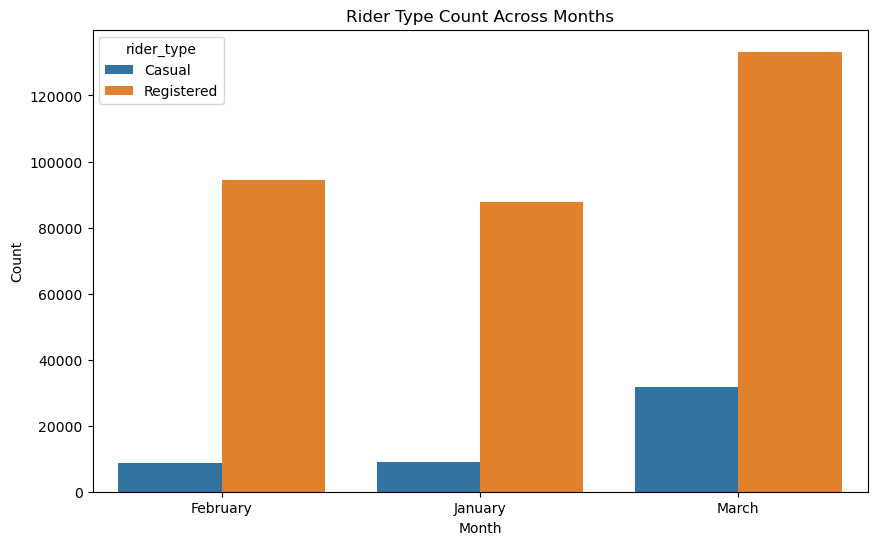

In [40]:
# get the month 
data['month']=data['start_time'].dt.month_name()

count_df = data.groupby(['month', 'rider_type']).size().reset_index(name='count')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='month', y='count', hue='rider_type', data=count_df, ci=None)
plt.title('Rider Type Count Across Months')
plt.ylabel('Count')
plt.xlabel('Month')
plt.show()

### 1. **User Acquisition / Conversion Rate:**
   - **Metric:**
     - **Ratio of Registered to Casual Users**
   - **Why it’s Important:**
     - Understanding the composition of the user base is crucial. A higher number of registered users typically indicates a more stable and predictable revenue stream, and it can signify higher user engagement and loyalty. This metric can also aid in tailoring marketing strategies to convert casual users to registered ones.
   - **Data Needed:**
     - User type (Registered/Casual) from the ride history table.
   - **Additional Consideration:**
     - Monitoring the conversion rate of casual users to registered users over time can provide insights into the effectiveness of strategies aimed at encouraging user commitment.

### 2. **Operational Efficiency and User Satisfaction:**
   - **Metric:**
     - **Bike Availability and Utilization Rate**
   - **Why it’s Important:**
     - Ensuring that bikes are adequately available and well-utilized is crucial for user satisfaction and operational efficiency. Analyzing availability and utilization can highlight areas for redistributing bikes and can inform maintenance scheduling to minimize downtime.
   - **Data Needed:**
     - Real-time bike availability data from each station.
     - Ride history data for calculating utilization rate.
   - **Additional Consideration:**
     - Gathering and analyzing customer feedback and satisfaction scores can provide qualitative insights into user experiences, unmet needs, and potential areas for service improvement.

### 3. **Financial Health and Sustainability:**
   - **Metric:**
     - **Monthly Revenue and Operating Cost**
   - **Why it’s Important:**
     - Assessing the revenue against the operating costs is foundational for understanding the financial sustainability of the program. It can reveal whether the program is operating at a profit or a loss and can inform adjustments to pricing or cost structures.
   - **Data Needed:**
     - Revenue data (potentially from user subscriptions and casual ride fees).
     - Operating cost data (including maintenance, redistribution, and overhead costs).
   - **Additional Consideration:**
     - Analyzing the Average Revenue per User (ARPU) and the Lifetime Value (LTV) of a customer can inform decisions regarding marketing spend, customer acquisition strategies, and customer retention efforts.


# Demand

In [204]:
import pandas as pd

# Assuming 'data' DataFrame contains the historical bike rental data
data['start_hour'] = data['start_time'].dt.hour
station_data = data[data['start_station'] == '10th St & Constitution Ave NW']

# Aggregate data to get the number of bikes rented every hour
hourly_demand = station_data.groupby(['start_hour']).size().reset_index(name='demand')


In [205]:
from sklearn.model_selection import train_test_split

X = hourly_demand[['start_hour']]
y = hourly_demand['demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [206]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 28504.621840659667


In [208]:
# Predicting demand for the next hour
next_hour = pd.DataFrame({'start_hour': [14]})  # replace 13 with the desired hour
predicted_demand = model.predict(next_hour)
print(f'Predicted Demand for Next Hour: {predicted_demand[0]}')


Predicted Demand for Next Hour: 125.5438184663537


In [210]:
# more work will be done in the future for the predictive analytics part of this project